In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
stocks=yf.download(['AAPL','GS','PYPL','GOOGL','DDOG','MSFT'],start='2020-01-01',end='2023-09-09')['Adj Close']
stocks.head()

[*********************100%%**********************]  6 of 6 completed


,AAPL,DDOG,GOOGL,GS,MSFT,PYPL
Date,,,,,,
2020-01-02,73.249031,36.700001,68.433998,214.095276,155.093689,110.750000
2020-01-03,72.536896,37.419998,68.075996,211.591766,153.162491,108.760002
2020-01-06,73.114891,39.900002,69.890503,213.757202,153.558380,110.169998
2020-01-07,72.771019,40.060001,69.755501,215.164261,152.158295,109.669998
2020-01-08,73.941643,39.950001,70.251999,217.238358,154.581924,111.820000


In [3]:
stocks.describe()

,AAPL,DDOG,GOOGL,GS,MSFT,PYPL
count,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000
mean,135.936485,97.731293,105.651420,294.124836,251.434236,152.431924
std,32.509507,33.417946,24.871216,69.583457,50.812917,76.641699
min,54.848969,28.959999,52.706501,124.074417,131.117859,58.599998
25%,119.412041,78.225002,86.994377,224.330910,211.370125,80.374998
50%,141.984230,93.579998,105.552502,317.360565,250.812759,119.605000
75%,158.870625,110.244997,125.626625,346.051727,289.603333,215.887497
max,196.185074,196.559998,149.838501,401.437286,358.730469,308.529999


In [4]:
# calculation of the log returns
stock_returns=np.log(stocks/stocks.shift(1))
stock_returns.dropna(inplace=True)# dropping the first row of NAN
cov=stock_returns.cov()# covariance matrix
#calculation of percentage returns
stock_returns2=stocks.pct_change()
stock_returns2.dropna(inplace=True)

In [5]:
stock_returns# showing of log returns

,AAPL,DDOG,GOOGL,GS,MSFT,PYPL
Date,,,,,,
2020-01-03,-0.009770,0.019428,-0.005245,-0.011762,-0.012530,-0.018132
2020-01-06,0.007937,0.064171,0.026305,0.010182,0.002581,0.012881
2020-01-07,-0.004714,0.004002,-0.001933,0.006561,-0.009159,-0.004549
2020-01-08,0.015958,-0.002750,0.007092,0.009593,0.015803,0.019415
2020-01-09,0.021018,0.006487,0.010443,0.020152,0.012415,0.006685
...,...,...,...,...,...,...
2023-09-01,0.008428,0.012873,-0.003752,-0.000946,0.002742,0.016815
2023-09-05,0.001266,0.002759,0.000811,-0.011211,0.014769,0.002671
2023-09-06,-0.036450,-0.003475,-0.009696,-0.008126,-0.002011,-0.014857


In [6]:
stock_returns2# showing of the percentage returns

,AAPL,DDOG,GOOGL,GS,MSFT,PYPL
Date,,,,,,
2020-01-03,-0.009722,0.019618,-0.005231,-0.011693,-0.012452,-0.017968
2020-01-06,0.007968,0.066275,0.026654,0.010234,0.002585,0.012964
2020-01-07,-0.004703,0.004010,-0.001932,0.006583,-0.009118,-0.004538
2020-01-08,0.016086,-0.002746,0.007118,0.009640,0.015928,0.019604
2020-01-09,0.021241,0.006508,0.010498,0.020357,0.012493,0.006707
...,...,...,...,...,...,...
2023-09-01,0.008463,0.012956,-0.003745,-0.000946,0.002746,0.016957
2023-09-05,0.001267,0.002763,0.000811,-0.011148,0.014879,0.002674
2023-09-06,-0.035793,-0.003469,-0.009649,-0.008093,-0.002009,-0.014747


In [7]:
#Showing the covariance matrix of assets_returns
cov

,AAPL,DDOG,GOOGL,GS,MSFT,PYPL
AAPL,0.000476,0.000397,0.000328,0.000252,0.000361,0.000398
DDOG,0.000397,0.001597,0.000399,0.000220,0.000457,0.000633
GOOGL,0.000328,0.000399,0.000458,0.000243,0.000358,0.000366
GS,0.000252,0.000220,0.000243,0.000498,0.000240,0.000301
MSFT,0.000361,0.000457,0.000358,0.000240,0.000444,0.000389
PYPL,0.000398,0.000633,0.000366,0.000301,0.000389,0.000942


In [8]:
assets_mean=stock_returns.mean()
assets_std=stock_returns.std() # std of returns(sigma)
assets_std
assets_mean=252*assets_mean # annualized the mean returns of assets=> 252 trading days in a year(mu)
assets_mean

AAPL     0.241651
DDOG     0.266059
GOOGL    0.187457
GS       0.113904
MSFT     0.208755
PYPL    -0.162218
dtype: float64

In [9]:
assets_s0=stocks.iloc[-1]# stroring the latest adjacent price of the assets(S0)
assets_s0

AAPL     178.179993
DDOG      97.660004
GOOGL    136.380005
GS       325.519989
MSFT     334.269989
PYPL      60.980000
Name: 2023-09-08 00:00:00, dtype: float64

In [10]:

def mcs(initial_price, annual_return, volatility, days, simulations):
    dt = 1 / 252  # Trading days per year (252)
    daily_returns = np.exp((annual_return - 0.5 * volatility ** 2) * dt + volatility * np.sqrt(dt) * np.random.randn(days, simulations))

    # Create an array to store simulated stock prices
    price_matrix = np.zeros_like(daily_returns)
    price_matrix[0] = initial_price

    for t in range(1, days):
        price_matrix[t] = price_matrix[t - 1] * daily_returns[t]

    return price_matrix



In [13]:

simulated_prices=mcs(assets_s0['AAPL'],assets_mean['AAPL'],assets_std['AAPL'],1260,10000)

def plot(S):
 plt.figure(figsize=(21, 9))
 plt.title('Monte Carlo Simulation of Stock Prices')
 plt.xlabel('Trading Days')
 plt.ylabel('Stock Price')
 for i in range(10000):
    plt.plot(S[:, i])
 plt.grid(True)
 plt.show()

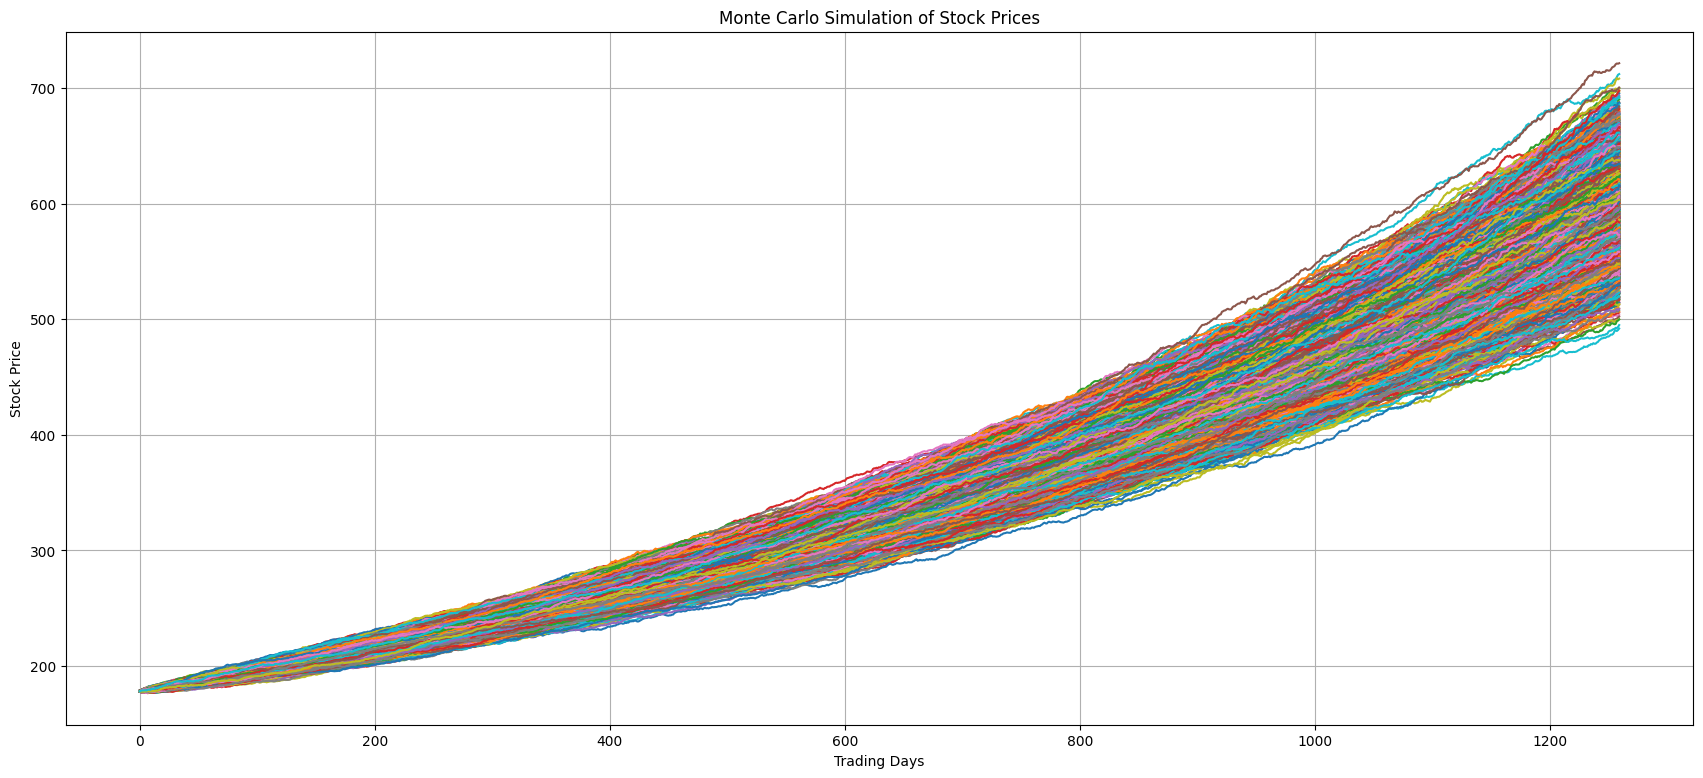

In [15]:
plot(simulated_prices)


In [16]:
def mcp(mean_returns,cov_returns,num_simulations,risk,risk_free_rate):
  risk=float(risk)
  all_weights=np.zeros((num_simulations,len(mean_returns)))
  ret_arr=np.zeros(num_simulations)
  vol_arr=np.zeros(num_simulations)
  vol_arr2=np.zeros(num_simulations)
  sharp_arr=np.zeros(num_simulations)
  for i in range(num_simulations):
    weights=np.random.random((6))# weights randomized generation
    weights=weights/np.sum(weights)# making them fractional weights such that their sum is equal to 1
    all_weights[i,:]=weights#storing the weights
  # all required arrays to store all the generated weights,returns,volatility,sharp-ratio(std)

    vol_arr[i]=np.sqrt(np.dot(weights.T,np.dot(cov_returns*252,weights)))# calculating portfolios std using weights and std of the asset classes
    vol_arr2[i]=risk*(vol_arr[i])*(vol_arr[i])
    ret_arr[i]=np.sum(mean_returns*weights)+risk*(vol_arr[i])*(vol_arr[i])# calculating portfolios return using weights and return of the asset classes and the risk aversion factor
    if(risk_free_rate=='Bull'):
     sharp_arr[i]=(ret_arr[i]-0.062)/vol_arr[i]# sharpe ratio calculation for a bull market
    elif(risk_free_rate=='Bear'):
      sharp_arr[i]=(ret_arr[i]-0.306)/vol_arr[i] # sharpe ratio calculation for a bear market



  a=sharp_arr.argmax() # storing the index of the maximum sharpe_ratio portfolio
  return a,all_weights[a,:],sharp_arr[a],np.sqrt(vol_arr2[a]),ret_arr[a],ret_arr,np.sqrt(vol_arr2),sharp_arr,all_weights

In [17]:
def plot2(a,vol_arr,ret_arr,sharp_arr):
  max_sr_ret = ret_arr[a]
  max_sr_vol = vol_arr[a]
  plt.figure(figsize=(21,9))
  plt.scatter(vol_arr,ret_arr,c=sharp_arr,cmap='plasma')
  plt.savefig('scatterplot.png')
  plt.colorbar(label='Sharpe Ratio')
  plt.xlabel('Volatility')
  plt.ylabel('Return')
# Add red dot for max SR
  plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')


In [18]:
position_max_sharp_,optimal_weights,max_sharp_ratio,expected_risk,expected_return,all_returns,all_risk,all_sharp_ratio,all_weights=mcp(assets_mean,cov,1000,0.3,'Bull')
expected_return

0.26271537533358486

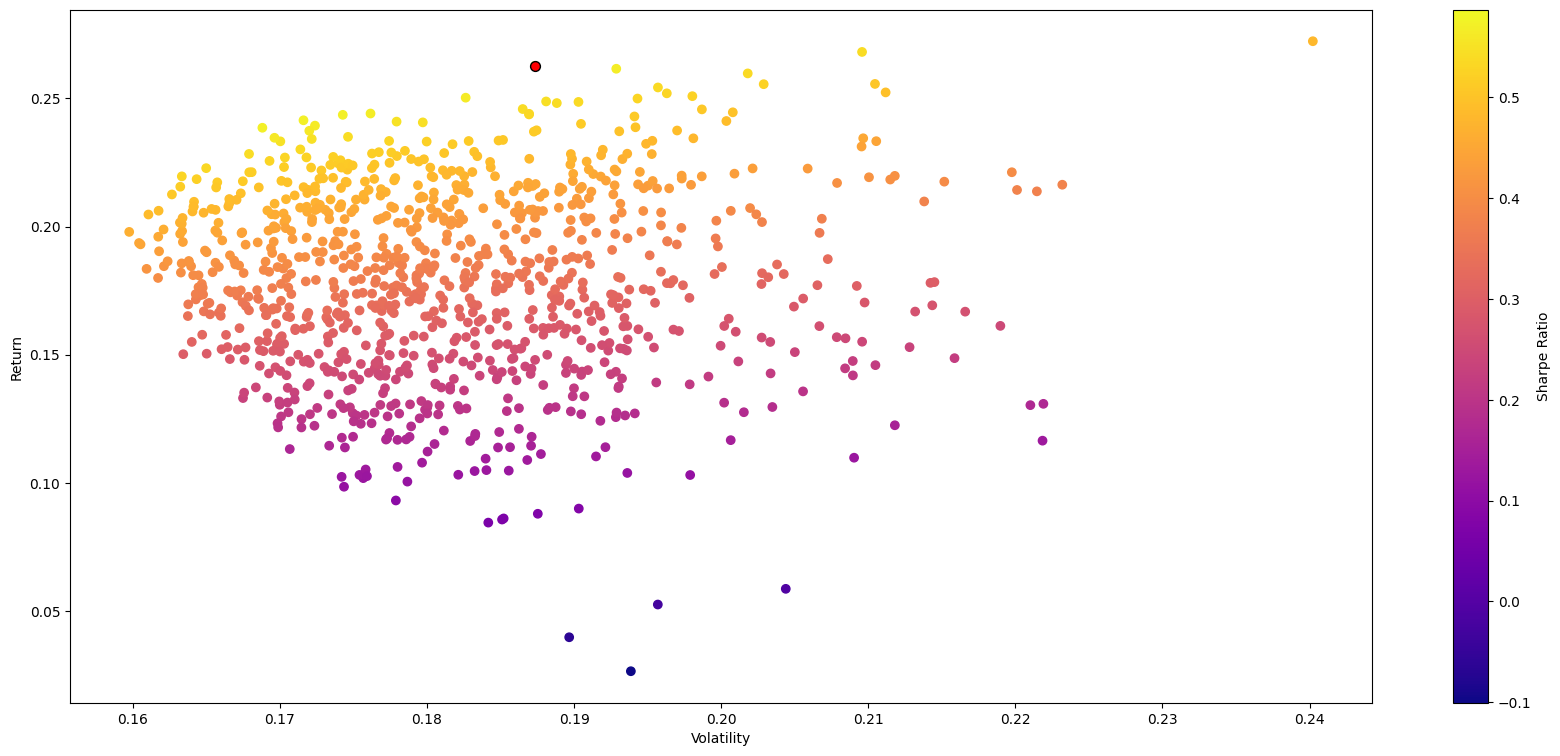

In [19]:
plot2(position_max_sharp_,all_risk,all_returns,all_sharp_ratio)

In [20]:
arr2=np.zeros(40)
arr3=np.zeros(40)
arr1=np.zeros(40)
arr4=np.zeros((40,6))
for i in range(0,40):
 position_max_sharp_,optimal_weights,max_sharp_ratio,expected_risk,expected_return,all_returns,all_risk,all_sharp_ratio,all_weights=mcp(assets_mean,cov,10000,i/40,'Bull')
 arr2[i]=(expected_return)
 arr3[i]=(expected_risk)
 arr1[i]=(max_sharp_ratio)
 arr4[i,:]=(optimal_weights)

In [21]:
arr22=np.zeros(40)
arr32=np.zeros(40)
arr12=np.zeros(40)
arr42=np.zeros((40,6))
for i in range(0,40):
 position_max_sharp_,optimal_weights,max_sharp_ratio,expected_risk,expected_return,all_returns,all_risk,all_sharp_ratio,all_weights=mcp(assets_mean,cov,10000,i/40,'Bear')
 arr22[i]=(expected_return)
 arr32[i]=(expected_risk)
 arr12[i]=(max_sharp_ratio)
 arr42[i,:]=(optimal_weights)

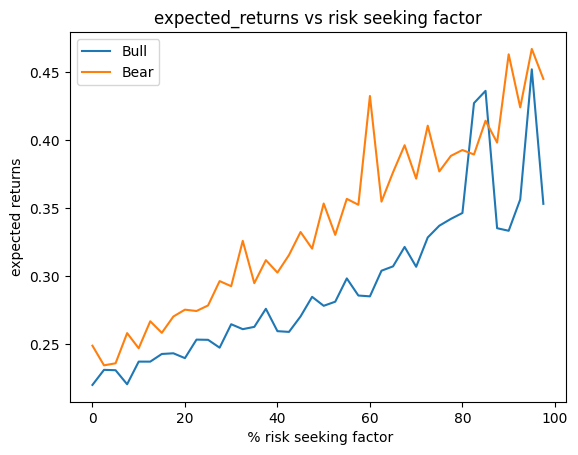

In [22]:
x_labels =np.arange(0, len(arr2))*2.5
x_labels2 =np.arange(0, len(arr22))*2.5

# Create the line plot
sns.lineplot(x=x_labels, y=arr2,label='Bull')
sns.lineplot(x=x_labels2, y=arr22,label='Bear')

# Customize the plot labels and title
plt.xlabel(' % risk seeking factor')
plt.ylabel('expected returns')
plt.title('expected_returns vs risk seeking factor')
# Show the plot
plt.show()

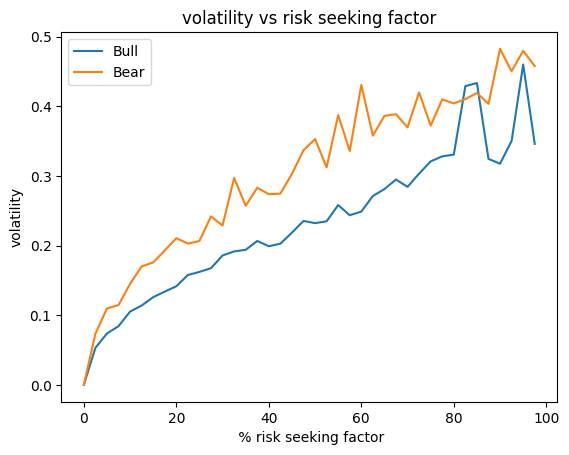

In [23]:
x_labels =np.arange(0, len(arr3))*2.5
x_labels2 =np.arange(0, len(arr32))*2.5

# Create the line plot
sns.lineplot(x=x_labels, y=arr3,label='Bull')
sns.lineplot(x=x_labels2, y=arr32,label='Bear')

# Customize the plot labels and title
plt.xlabel(' % risk seeking factor')
plt.ylabel('volatility')
plt.title('volatility vs risk seeking factor')

# Show the plot
plt.show()

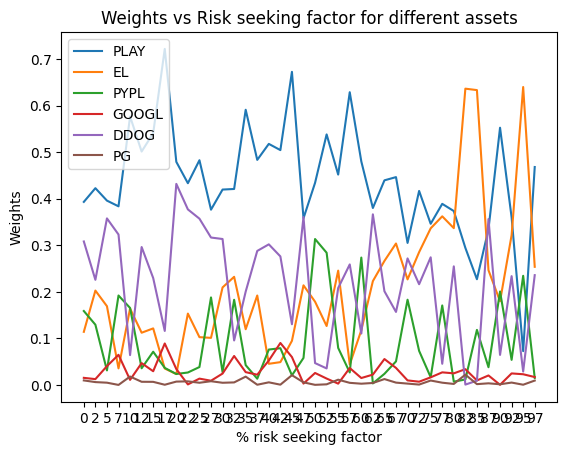

In [24]:
x_labels = [str(int(i * 2.5)) for i in range(arr4.shape[0])]

# Label the columns
y_labels =['PLAY','EL','PYPL','GOOGL','DDOG','PG','GLD']
# Create a heatmap
for i in range(arr4.shape[1]):
    sns.lineplot(x=x_labels, y=arr4[:, i], label=y_labels[i])

# Label the x and y axes
plt.xlabel('% risk seeking factor')
plt.ylabel('Weights')
plt.title('Weights vs Risk seeking factor for different assets')
# Show the plot
plt.show()

In [25]:
# I define basically like this:
# risk<=0.3->conservative, 0.3<risk<=0.5->moderate,risk>=0.5->aggressive
def Risk_Profile_Indicator(risk):
  risk = float(risk)  # Convert user input to a floating-point number
  if(risk>=0.5):
    print('You are an aggressive Investor')
  elif(risk<=0.3):
    print("You are a conservative Investor")
  else:
    print('You are a moderate Investor')

In [26]:
def portfolio_optimization():
  print("This model is based on Bulls and Bears economic market based")
  b=input('Please enter type of market from the above mentioned')
  a=input('Please enter a positive number as your risk seeking factor(upto 1):')
  Risk_Profile_Indicator(a)
  position_max_sharp_,optimal_weights,max_sharp_ratio,expected_risk,expected_return,all_returns,all_risk,all_sharp_ratio,all_weights=mcp(assets_mean,cov,10000,a,b)
  print('Your Optimal weights are:')
  print(optimal_weights)
  print('Your Expected Return:',expected_return)
  print('Your Expected Risk:',expected_risk)

In [27]:
portfolio_optimization()

This model is based on Bulls and Bears economic market based
Please enter type of market from the above mentionedBull
Please enter a positive number as your risk seeking factor(upto 1):0.25
You are a conservative Investor
Your Optimal weights are:
[0.65718225 0.11826    0.11572897 0.0285881  0.07008706 0.01015361]
Your Expected Return: 0.25514709678415576
Your Expected Risk: 0.16413418402289698
